MACD -  MOVING AVERAGE CONVERGENCE DIVERGENCE STRATEGY ( Cross Over Strategy)

The strategy uses the following :
MACD = 26 day EMA of 'Close' - 12 day EMA of 'Close'
Signal = 9 day EMA of MACD

TRading Signal :
When MACD crosses above Signal , go Long
When MACD crosses below Signal , Go Short

A crossover occurs when the signal and MACD line cross each other. The MACD generates a bullish signal when it moves above its own nine-day EMA and sends a sell signal (bearish) when it moves below its nine-day EMA.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime as dt

import pyfolio as pf 
import quantstats as qs

In [41]:
class Backtest_MACD_Crossover_Strategy:
    def __init__(self,ticker,start_date,end_date,fast_ma_period,slow_ma_period,signal_period):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.fast_ma_period = fast_ma_period
        self.slow_ma_period = slow_ma_period
        self.signal_period = signal_period
        
        self.fetch_data()
        self.indicators()
        self.positions()
        self.returns()
        
    def fetch_data(self):
        self.df_raw = yf.download(self.ticker,self.start_date,self.end_date)
        print(f"rows and columns : {self.df_raw.shape}")
        self.df = self.df_raw.copy()
        return self.df
    
    def indicators(self):
        self.df['ema26']= self.df['Close'].ewm(span = self.fast_ma_period,adjust = False).mean()
        self.df['ema12'] = self.df['Close'].ewm(span = self.slow_ma_period,adjust = False).mean()
        self.df['MACD'] = self.df['ema26'] - self.df['ema12']
        self.df['signal'] = self.df['MACD'].ewm(span = self.signal_period,adjust = False).mean()
        
        self.df[['signal','MACD','Close']].plot(figsize=(12,8), grid = True,secondary_y = 'Close')
    
    def positions(self):
        self.df['position'] = np.where(self.df['MACD']>self.df['signal'],1,-1)
        self.df['position'] = self.df['position'].shift(-1)
        
    def returns(self):
        self.df['cc_returns'] = np.log(self.df['Close']/self.df['Close'].shift(1))
        self.df['MACD_strategy_returns'] = self.df['cc_returns'] * self.df['position']
        self.df['Cummulative_strategy_returns'] = (1+ self.df['MACD_strategy_returns']).cumprod() -1
        return self.df['Cummulative_strategy_returns']
    
    def analysis(self,asset):
        self.df['MACD_strategy_returns'].plot(figsize=(12,8),grid=True)
        plt.title(f"Cummulative Returns of MACD Strategy for {asset}")
        plt.show()
        
        self.df[['MACD_strategy_returns','position']].plot(figsize=(12,8),grid=True,secondary_y='position')
        plt.title(f"Cummulative Returns of MACD Strategy and positions for {asset}")
        plt.show()
        
        self.df[['cc_returns','MACD_strategy_returns']].cumsum().plot(figsize = (15,10),secondary_y = 'position')
        plt.title(f"Buy & hold' vs 'MACD crossover strategy' cumulative returns for {asset}")
        plt.show()
        
        qs.reports.basic(self.df['MACD_strategy_returns'])
        
        pf.create_simple_tear_sheet(self.df['MACD_strategy_returns'])

In [42]:
def main():
    end_date = dt.datetime(2023,11,5).date()
    start_date =end_date - dt.timedelta(days = 365*3)
    asset = 'ASHOKLEY.NS'
    # stock_list = [  #'BAJFINANCE.NS',
    #             # 'TRENT.NS',
    #             'BPCL.NS'
    #             # 'BRITANNIA.NS',
    #             # 'COALINDIA.NS'
    #             # 'DRREDDY.NS',
    #             # 'GAIL.NS',
    #             #'ASIANPAINT.NS',
    #             # 'ASHOKLEY.NS',
    #             #'L&TFH.NS',
    #             # 'TCS.NS',
    #             # 'LUPIN.NS',
    #             # 'CUMMINSIND.NS',
    #             #'COFORGE.NS'                   
    #         ]
    a = Backtest_MACD_Crossover_Strategy(asset,start_date,end_date,26,12,9)
    a.analysis(asset)
    

[*********************100%%**********************]  1 of 1 completed
rows and columns : (743, 6)


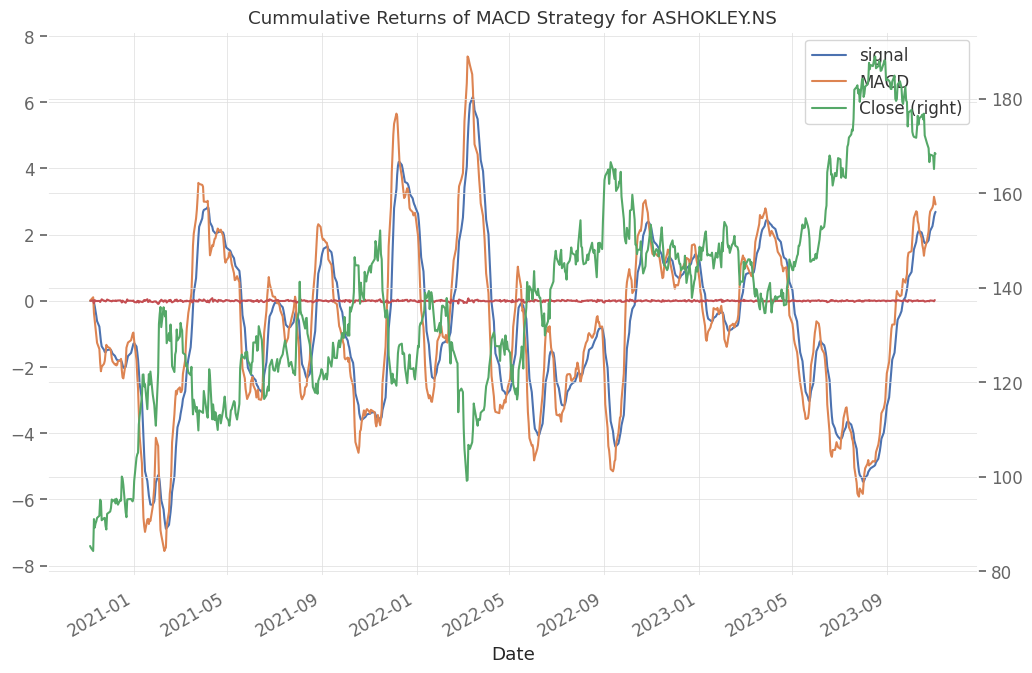

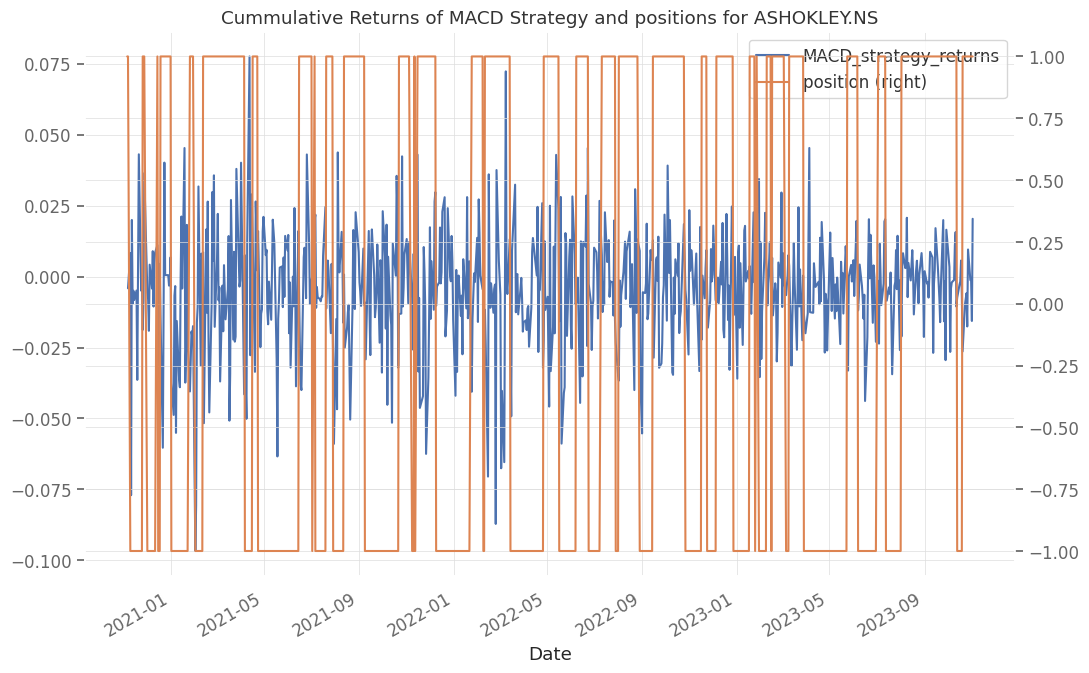

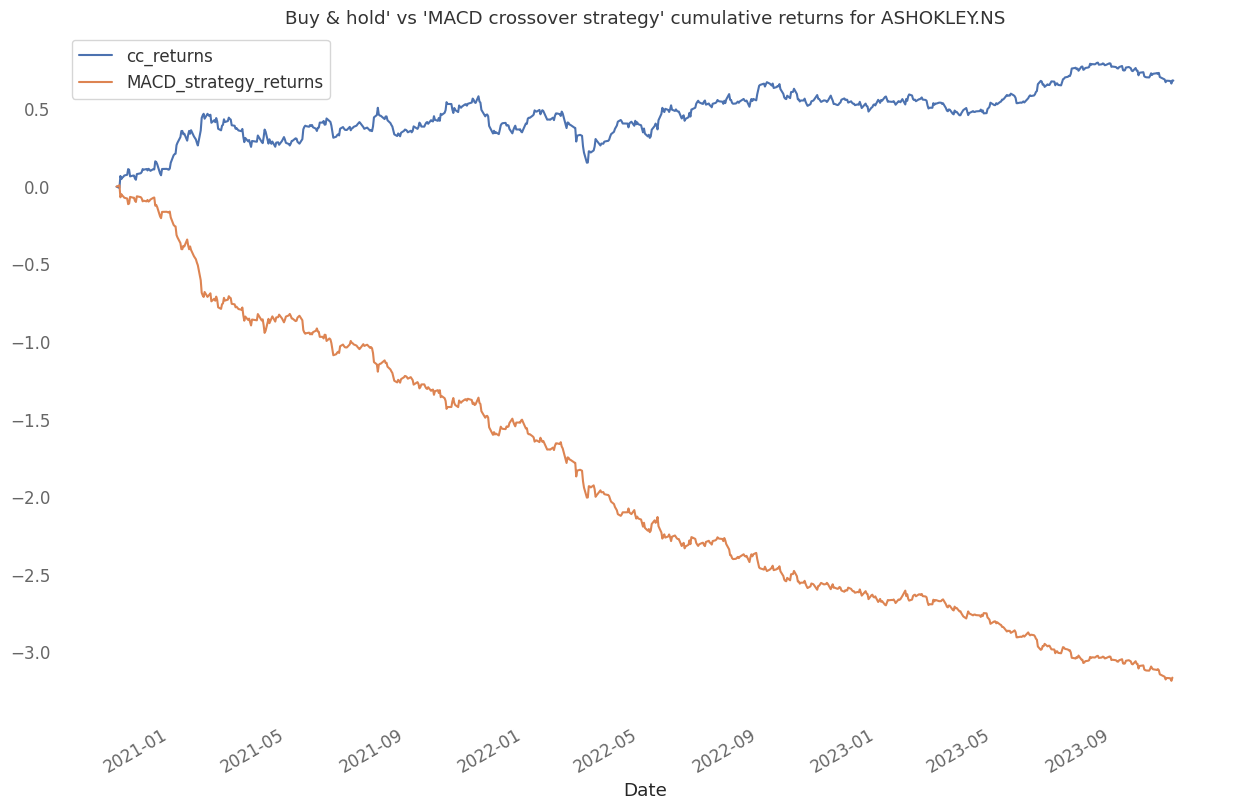

                    Strategy
------------------  ----------
Start Period        2020-11-06
End Period          2023-11-02
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -96.42%
CAGR﹪              -53.65%

Sharpe              -3.32
Prob. Sharpe Ratio  0.0%
Sortino             -3.88
Sortino/√2          -2.75
Omega               0.56

Max Drawdown        -96.5%
Longest DD Days     1088

Gain/Pain Ratio     -0.44
Gain/Pain (1M)      -0.96

Payoff Ratio        0.78
Profit Factor       0.56
Common Sense Ratio  0.37
CPC Index           0.18
Tail Ratio          0.66
Outlier Win Ratio   3.31
Outlier Loss Ratio  3.74

MTD                 0.44%
3M                  -11.27%
6M                  -30.03%
YTD                 -41.95%
1Y                  -45.88%
3Y (ann.)           -53.67%
5Y (ann.)           -53.65%
10Y (ann.)          -53.65%
All-time (ann.)     -53.65%

Avg. Drawdown       -96.5%
Avg. Drawdown Days  1088
Recovery Factor     3.28
Ulcer Index         0.82
Seren

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


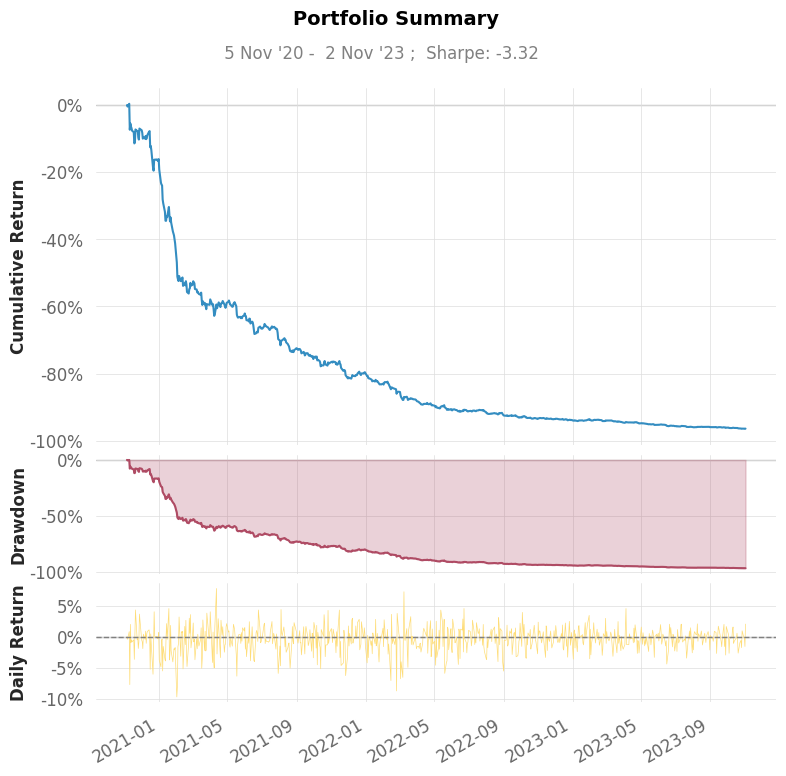

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


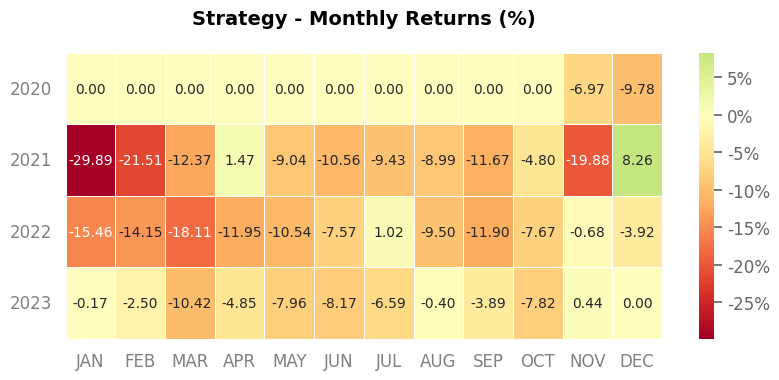

Start date,2020-11-05
End date,2023-11-03
Total months,35
,Backtest
Annual return,-67.7%
Cumulative returns,-96.4%
Annual volatility,32.4%
Sharpe ratio,-3.32
Calmar ratio,-0.70
Stability,0.97
Max drawdown,-96.5%


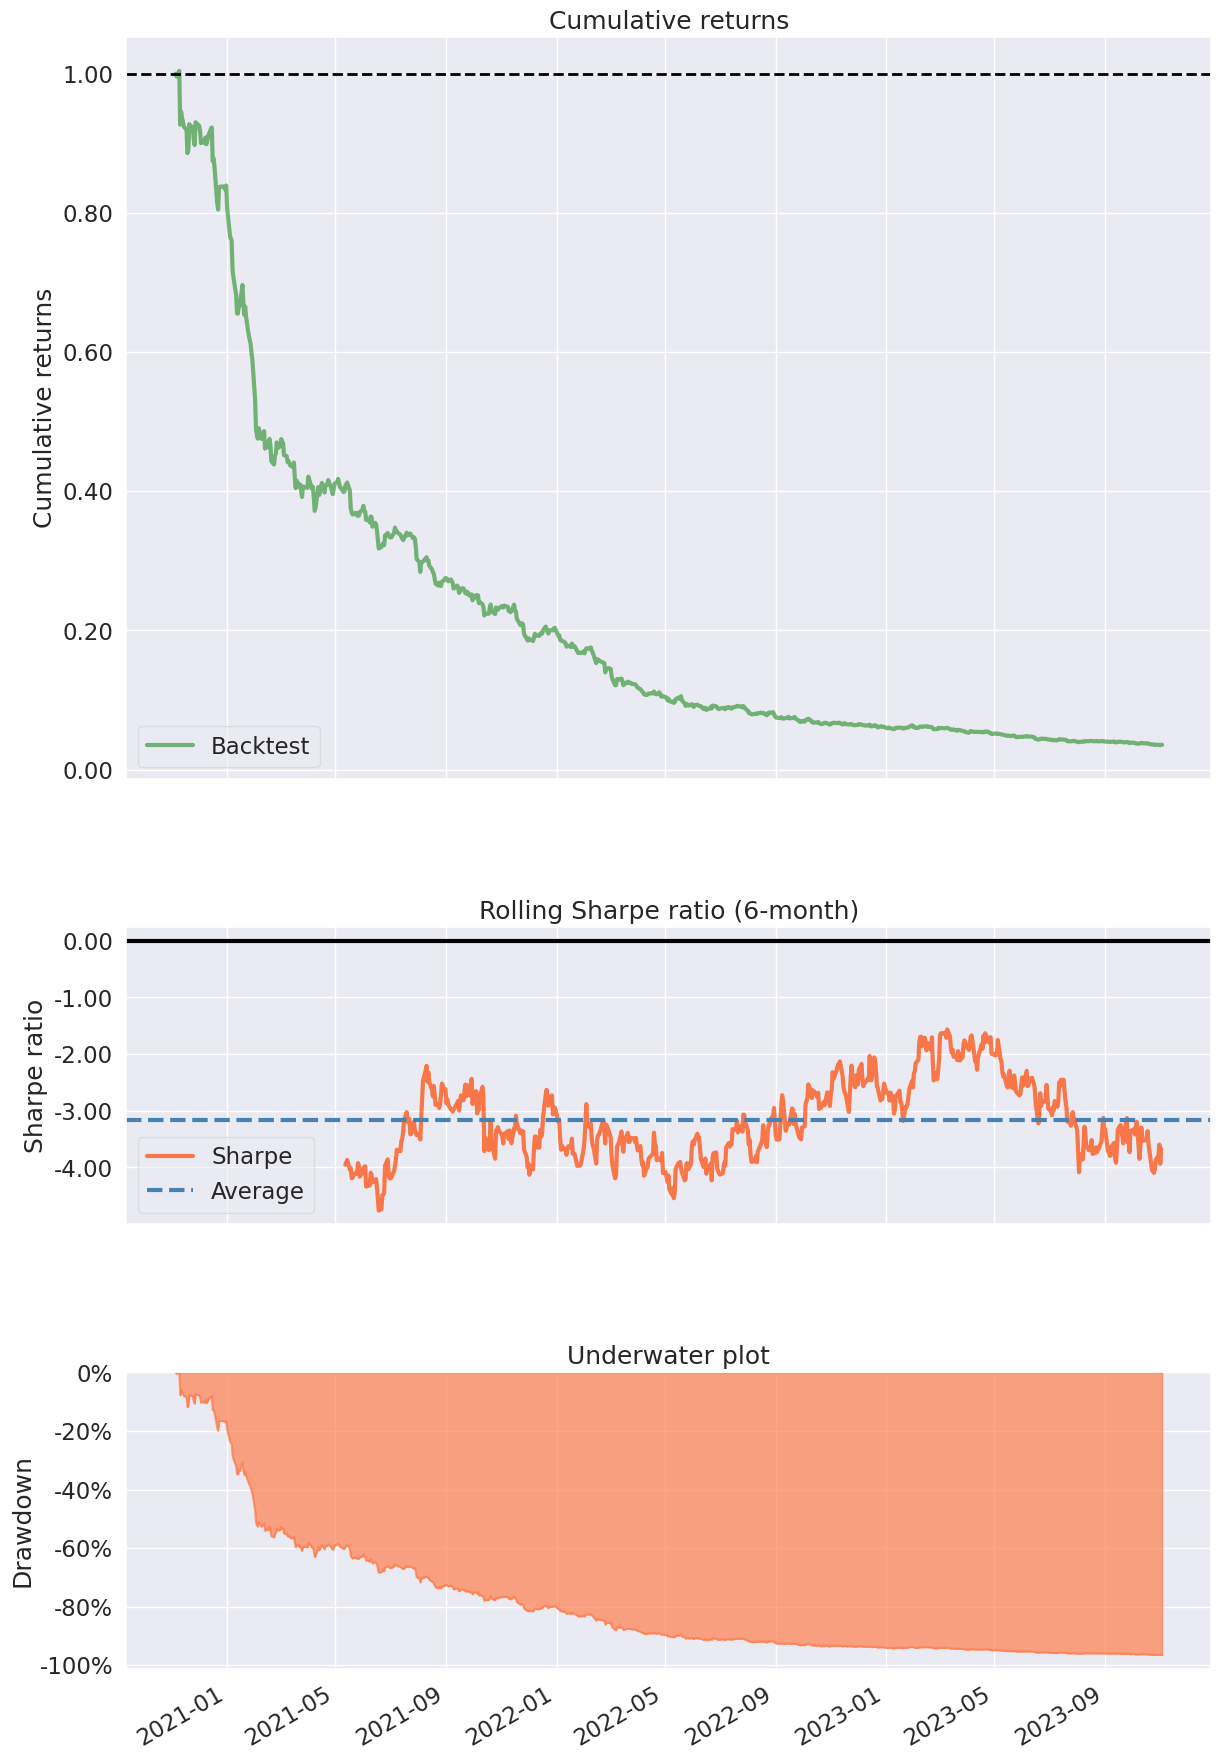

In [43]:
if __name__ == '__main__':
    main()
    